In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def get_topwords(word_dist, k=20):
    if "term" not in word_dist:
        word_dist["term"] = word_dist.index
    newlist = pd.DataFrame(columns=[item for item in word_dist.columns if item != "term"])
    for col in newlist:
        newlist[col] = word_dist.sort_values(by=col, ascending=False).head(k)["term"].values
    return newlist

def load_file(wfolder, config_name):
    topic_dist = pd.read_csv(os.path.join(wfolder, "document_topic_dist_%s.csv"%config_name))
    word_dist = pd.read_csv(os.path.join(wfolder, "topic_word_dist_%s.csv"%config_name))
    return topic_dist, word_dist, get_topwords(word_dist, 10)
    

In [3]:
wfolder = "./data/nips/"

In [4]:
author_id = pd.read_csv(os.path.join(wfolder, "author_ids.map"))

In [40]:
authors_onehot_train = pd.read_csv(os.path.join(wfolder, "corpus_train_authors_onehot.csv"), header=None)
authors_onehot_test = pd.read_csv(os.path.join(wfolder, "corpus_test_authors_onehot.csv"), header=None)

In [52]:
plt.rcParams.setdefault("font.size", 20)

10.0

# nips data profiling

In [53]:
authors = pd.read_csv(os.path.join(wfolder, "authors.csv"))
paper_authors = pd.read_csv(os.path.join(wfolder, "paper_authors.csv"))
papers = pd.read_csv(os.path.join(wfolder, "papers.csv")).drop("paper_text", axis=1)

In [54]:
papers.shape

(7241, 6)

Text(0, 0.5, 'number of papers')

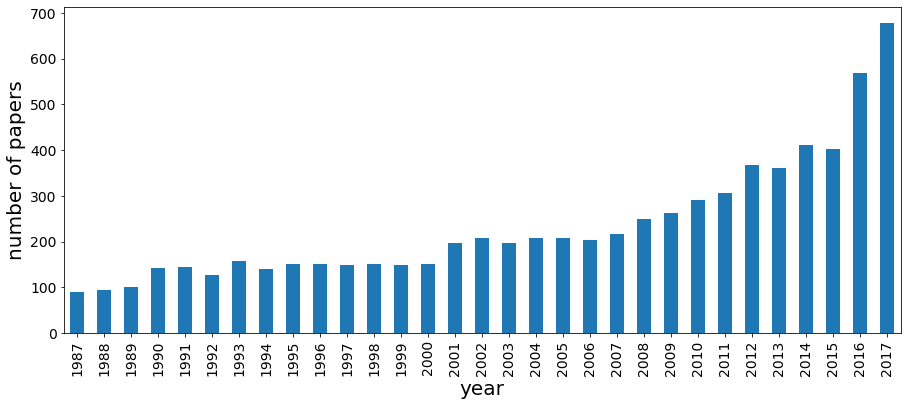

In [55]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
papers.year.value_counts().sort_index().plot(kind="bar", ax=ax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("year", fontsize=20)
ax.set_ylabel("number of papers", fontsize=20)


In [56]:
no_author_paper = paper_authors.groupby("paper_id").size().value_counts().sort_index()


Text(0, 0.5, 'number of papers')

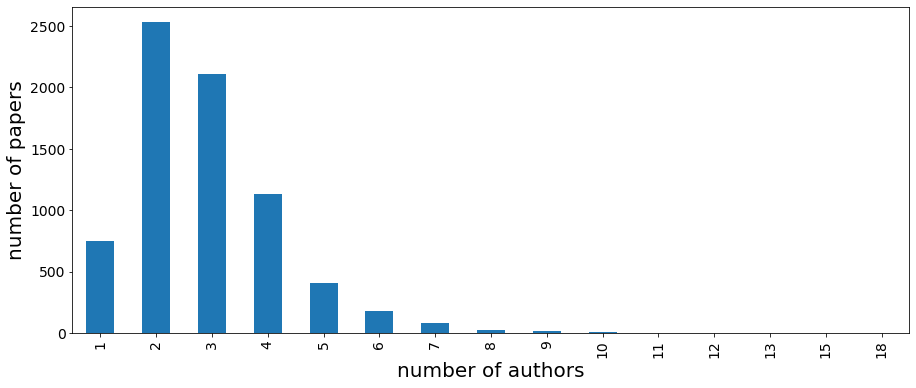

In [57]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
no_author_paper.plot(kind="bar", ax=ax)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.set_xlabel("number of authors", fontsize=20)
ax.set_ylabel("number of papers", fontsize=20)

In [58]:
no_papers_author = paper_authors.author_id.value_counts().reset_index().rename(columns={"index": "author_id", "author_id":"cnt"})
no_papers_author = pd.merge(no_papers_author, authors, left_on="author_id", right_on="id").set_index("name")

In [59]:
no_papers_author

,author_id,cnt,id
name,,,
Michael I. Jordan,330,79,330
Bernhard Sch?lkopf,1472,62,1472
Yoshua Bengio,178,60,178
Geoffrey E. Hinton,121,58,121
Zoubin Ghahramani,1020,51,1020
Terrence J. Sejnowski,54,48,54
Peter Dayan,632,47,632
Lawrence Carin,3001,41,3001
Alex J. Smola,1410,40,1410


Text(0, 0.5, 'number of papers')

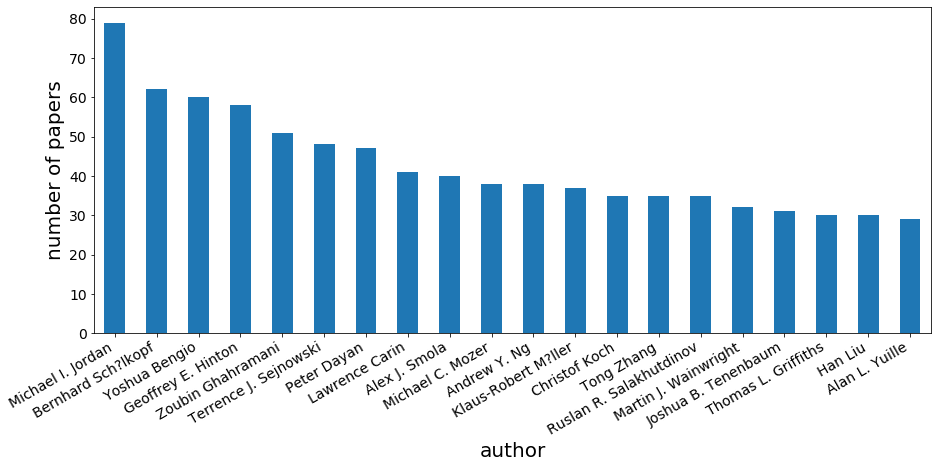

In [60]:
fig, ax = plt.subplots(figsize=(15, 6), facecolor="w")
no_papers_author.cnt.head(20).plot(kind="bar", ax=ax)
plt.xticks(fontsize=14, rotation=30, ha="right")
plt.yticks(fontsize=14)
ax.set_xlabel("author", fontsize=20)
ax.set_ylabel("number of papers", fontsize=20)

# use prodlda

In [61]:
config_name = "nvprodlda_tfidf_nips"
topic_dist, word_dist, newlist = load_file(wfolder, config_name)

In [62]:
# top 10 words for 50 topics
newlist 

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,category,neuron,graph,generator,recovery,label,policy,image,tdnn,kernel,...,customer,graph,image,layer,segmentation,vote,kernel,particle,teacher,variational
1,document,stimulus,cluster,gans,lasso,margin,action,visual,speech,unlabeled,...,gene,cluster,object,recurrent,image,worker,manifold,gp,hmms,topic
2,semantic,response,clique,kernel,rank,query,reward,neuron,utterance,regularization,...,hmm,vertex,video,net,object,item,xi,carlo,hmm,customer
3,word,spike,message,discriminator,matrix,theorem,agent,object,recurrent,convex,...,sampler,subgraph,convolutional,deep,pixel,crowdsourcing,yi,posterior,student,ibp
4,topic,filter,marginal,gan,norm,adaboost,reinforcement,motion,acoustic,dual,...,latent,node,cvpr,network,graph,price,rkhs,covariance,lift,posterior
5,image,eeg,bipartite,adversarial,sparse,classifier,regret,saliency,mlp,label,...,variational,walk,deep,convolutional,cvpr,preference,margin,prior,formula,gibbs
6,text,brain,subgraph,dimensionality,completion,classification,discount,pixel,speaker,xi,...,proposal,bipartite,pool,shallow,tree,rating,hilbert,gaussian,worker,latent
7,similarity,activity,vertex,wasserstein,column,loss,mdps,optical,network,formulation,...,dirichlet,linkage,layer,unit,configuration,auction,classification,diffusion,thread,dirichlet
8,web,fire,ising,semi,entry,boost,episode,location,unit,classification,...,beta,tree,translation,architecture,segment,buyer,smola,mcmc,moment,copula
9,object,channel,junction,supervise,proximal,bound,rl,orientation,waibel,transductive,...,nonparametric,edge,cnn,activation,parse,economic,unlabeled,mmd,hide,buffet


In [63]:
# top populated topics
newlist[[str(item) for item in topic_dist.top_topic.value_counts().index[:20]]]

,11,33,2,32,46,34,15,19,35,14,4,36,21,17,30,7,37,5,18,41
0,topic,image,graph,agent,kernel,neuron,margin,regret,tangent,variational,recovery,neuron,gp,object,estimator,image,neuron,label,regret,graph
1,document,deep,cluster,action,manifold,spike,classifier,lipschitz,generalization,message,lasso,spike,variational,image,lasso,visual,spike,margin,xt,cluster
2,dirichlet,convolutional,clique,reward,xi,stimulus,classification,sgd,network,mixture,rank,postsynaptic,posterior,shape,subspace,neuron,response,query,convex,vertex
3,lda,layer,message,policy,yi,fire,svms,convex,weight,gaussian,matrix,response,hyperparameters,pixel,recovery,object,circuit,theorem,submodular,subgraph
4,hash,pixel,marginal,reinforcement,rkhs,response,label,xt,net,gp,norm,stimulus,yn,descriptor,matrix,motion,signal,adaboost,lipschitz,node
5,cluster,object,bipartite,regret,margin,activity,kernel,online,perceptron,covariance,sparse,circuit,gaussian,detection,sparse,saliency,sejnowski,classifier,online,walk
6,hdp,encoder,subgraph,discount,hilbert,population,multiclass,loss,abu,posterior,completion,synaptic,covariance,transformation,entry,pixel,chip,classification,descent,bipartite
7,corpus,video,vertex,game,classification,cell,yi,gradient,backpropagation,likelihood,column,plasticity,hyperparameter,saliency,sparsity,optical,stimulus,loss,hazan,linkage
8,customer,cvpr,ising,rl,smola,visual,boost,yt,simard,gaussians,entry,chip,mcmc,video,tensor,location,visual,boost,lemma,tree
9,lsh,frame,junction,controller,unlabeled,cortical,svm,wt,mlp,propagation,proximal,fire,bayesian,scene,pca,orientation,filter,bound,proof,edge


In [10]:
xtable = topic_dist.groupby(["top_topic", "year"]).size().unstack().T
xtable

top_topic,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
year,,,,,,,,,,,,,,,,,,,,,
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,11.0,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,1.0,NaN,NaN,NaN,1.0,NaN,10.0,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,NaN,NaN,NaN,NaN,2.0,8.0,9.0,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,1.0,NaN,5.0,5.0,NaN,...,1.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1.0,NaN
1993,NaN,NaN,2.0,NaN,NaN,1.0,NaN,6.0,7.0,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1.0
1994,NaN,1.0,3.0,NaN,NaN,1.0,NaN,6.0,7.0,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN,NaN,NaN
1995,NaN,1.0,1.0,NaN,NaN,NaN,2.0,4.0,10.0,NaN,...,1.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN


In [13]:
topic_dist_test = pd.read_csv(os.path.join(wfolder, "document_topic_dist_test_%s.csv"%config_name))

# author lda

In [64]:
config_name = "nvprodlda_tfidf_nips_author"
topic_dist, word_dist, newlist = load_file(wfolder, config_name)

/home/ftang/Envs/slda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (832) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [65]:
newlist

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,hash,mozer,cann,tresp,dayan,topic,rbm,hsic,hmm,mohri,...,nu,privacy,koch,dominance,kawato,helicopter,salk,reward,music,slate
1,sanger,bower,module,assembly,episode,carin,tesauro,gretton,factorial,auc,...,sugiyama,pixelcnn,opper,equilibrium,articulator,montanari,sejnowski,committee,glms,dendritic
2,query,visuomotor,oscillatory,adaptor,hippocampus,policy,norb,node,griffiths,query,...,jin,cumulants,attend,hancock,suzuki,estimator,csp,ssc,voice,darwiche
3,bandit,boulder,stimulus,volker,dopamine,hawkes,munos,fukumizu,ibp,abc,...,tokyo,resistor,winther,game,emg,ruppin,terrence,singh,audio,renewal
4,spn,bcm,ext,potentiation,deliberation,decoder,rbms,unwrap,adaptor,australian,...,elad,harris,photoreceptor,ocular,muscle,rhythmic,eeg,action,causal,beltrami
5,herd,scm,fusion,obd,ibp,henao,ahmad,mode,bug,mehryar,...,mjolsness,exchangeability,psychophysical,mercer,formation,bandwidth,scalp,bisection,chromatic,mel
6,attainable,monotone,vibration,horn,moore,csp,dpp,shade,adf,dyadic,...,alignment,shapley,exclusive,pollack,fmri,organism,bci,policy,pitch,cone
7,hit,smd,bump,track,episodic,duke,ravikumar,lwr,pomdp,dct,...,linearization,policy,doya,intrator,ijk,lar,sep,helicopter,sound,acs
8,yuille,mario,parse,transelliptical,pouget,durham,hinton,lorenzo,subjective,rudolph,...,shatter,reservoir,motor,fractal,adversarial,janzing,erp,sm,ordinate,cell
9,graft,cooper,wave,damage,consolidation,lda,nserc,scene,sheet,vc,...,gate,hmms,manfred,poker,henao,larry,klaus,payoff,bp,choi


## top topics of example authors

In [66]:
prior_topic_dist = pd.read_csv(os.path.join(wfolder, "prior_topic_dist_%s.csv"%config_name)).T
#prior_topic_dist.columns = author_id.name.values

In [73]:
id_hinton = author_id[author_id.name.str.find("Hinton") > 0].id.values[0]

In [75]:
#top 5 topics for Hinton
newlist[prior_topic_dist[id_hinton].sort_values(ascending=False).head(5).index]

,6,33,9,18,29
0,rbm,dbm,mohri,tracker,topic
1,tesauro,bourlard,auc,alekh,restaurant
2,norb,pred,query,kg,steyvers
3,munos,causal,abc,postsynaptic,lda
4,rbms,frasconi,australian,econometrica,nade
5,ahmad,tewari,mehryar,mgp,rangan
6,dpp,plds,dyadic,gt,tangent
7,ravikumar,prop,dct,player,obstacle
8,hinton,silicon,rudolph,lmc,visuomotor
9,nserc,hedge,vc,erm,dirichlet


In [78]:
#top 5 topics for David Blei
id_hinton = author_id[author_id.name.str.find("Blei") > 0].id.values[0]
newlist[prior_topic_dist[id_hinton].sort_values(ascending=False).head(5).index]

,29,18,9,13,44
0,topic,tracker,mohri,voc,kawato
1,restaurant,alekh,auc,reservoir,articulator
2,steyvers,kg,query,sect,suzuki
3,lda,postsynaptic,abc,ramanan,emg
4,nade,econometrica,australian,rpca,muscle
5,rangan,mgp,mehryar,detection,formation
6,tangent,gt,dyadic,configural,fmri
7,obstacle,player,dct,neuron,ijk
8,visuomotor,lmc,rudolph,atk,adversarial
9,dirichlet,erm,vc,torso,henao


## cluster of authors based on the topics they are writing

In [23]:
from scipy import spatial, stats, cluster
from scipy.special import logsumexp

In [21]:
prior_topic_dist = pd.read_csv(os.path.join(wfolder, "prior_topic_dist_%s.csv"%config_name)).T
#prior_topic_dist.columns = author_id.name.values

In [24]:
tt = prior_topic_dist.values.T
tt = np.exp(tt - logsumexp(tt, axis=1)[:, None])
author_dist = spatial.distance.pdist(tt, lambda u, v: stats.entropy(u, v))

In [25]:
author_dist = pd.DataFrame(spatial.distance.squareform(author_dist), index=author_id.name.values, columns=author_id.name.values)

In [26]:
author_dist.head()

,John C. Platt,Hans Peter Graf,John S. Denker,C. Lee Giles,Tomaso Poggio,Les E. Atlas,James M. Bower,Christof Koch,Carver Mead,Richard P. Lippmann,...,Yaron Singer,Aviv Tamar,Il Memming Park,Aaron Roth,Ryan J. Tibshirani,Yizhe Zhang,Yuanzhi Li,Yuhuai Wu,Peter Battaglia,Alexander Schwing
John C. Platt,0.000000,107.609052,36.924566,93.922308,88.026074,77.395034,38.015932,86.645367,96.182055,5.233169,...,73.222237,81.689537,39.515164,0.774229,34.592628,109.970644,78.714030,60.308646,57.974361,123.504570
Hans Peter Graf,107.609052,0.000000,58.967810,29.130098,24.610757,123.840113,46.929493,95.187252,93.448093,0.026413,...,56.969520,62.092028,28.474325,68.233586,31.446313,50.453583,138.781438,136.325669,96.314475,93.352977
John S. Denker,36.924566,58.967810,0.000000,93.833194,44.189790,38.326243,86.725661,90.699782,77.858373,13.458409,...,11.999218,74.741369,32.735088,63.043778,67.204892,65.721706,14.899914,138.922645,54.254713,0.000006
C. Lee Giles,93.922308,29.130098,93.833194,0.000000,0.183232,103.462977,79.052470,98.930016,129.179036,47.015142,...,15.778299,27.613582,35.308708,115.439326,65.919142,110.551429,100.968724,101.668283,64.591874,90.383813
Tomaso Poggio,88.026074,24.610757,44.189790,0.183232,0.000000,91.174697,76.173204,93.634994,119.855063,48.001355,...,23.005871,28.571818,42.251239,112.795294,62.057106,108.837246,92.747165,100.749974,59.657075,87.353834


In [27]:
linkage = cluster.hierarchy.linkage(spatial.distance.squareform(author_dist.values))

In [79]:
clusters = pd.DataFrame({"clusid": cluster.hierarchy.fcluster(linkage, 1), "name" : author_id.name.values})
clusters = clusters.set_index("clusid")

In [85]:
clusters.groupby("clusid").size().sort_values(ascending=False)

clusid
66    93
21    64
17    47
31    36
28    23
      ..
49     1
64     1
65     1
67     1
47     1
Length: 74, dtype: int64

In [89]:
## top populated clusters
clusters.loc[66]

,name
clusid,
66,John C. Platt
66,Yann LeCun
66,Rodney M. Goodman
66,John G. Harris
66,John E. Moody
66,Richard S. Sutton
66,Richard S. Zemel
66,David A. Cohn
66,Christopher G. Atkeson


## authors closest to Hinton etc.

In [34]:
author_dist.loc["Geoffrey E. Hinton"].sort_values(ascending=True).head(10)

Geoffrey E. Hinton     0.000000
Gerald Tesauro         0.082617
Tom M. Mitchell        2.568822
Sanja Fidler           2.824046
Jimmy Ba               3.345364
Fang Han               3.924773
Thore Graepel          4.240164
Siwei Lyu              4.712829
Afshin Rostamizadeh    4.742714
David S. Touretzky     5.160903
Name: Geoffrey E. Hinton, dtype: float64

In [90]:
author_dist.loc["Yann LeCun"].sort_values(ascending=True).head(10)


Yann LeCun                  0.000000
David Silver                0.005354
Martha White                0.033923
Bharath K. Sriperumbudur    0.061337
Rina Foygel                 0.063569
Yuanzhi Li                  0.069675
Emma Brunskill              0.098433
David Sontag                0.105307
Ofer Meshi                  0.107066
Amir Globerson              0.107610
Name: Yann LeCun, dtype: float64